importing libraries

In [165]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

<h5>Importing files from directory<h5>

In [50]:
files = [file for file in os.listdir('./Sales_Data')]

In [52]:
list_of_dfs = []
all_months_data = pd.DataFrame()
for file in files:
    df1 = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df1])

In [53]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task1. Clean up the data

In [55]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]

In [59]:
all_months_data = all_months_data.dropna(how='all')

In [60]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Task2. Adding month column, before I get month from the date I need to check if all dates are valid

In [78]:
try:
    pd.to_datetime(all_months_data["Order Date"])
    has_date_format = True
except ValueError:
    has_date_format = False

In [79]:
has_date_format

True

#### I see that the date has wrong format so I need to clean it, the problem is in the headers as they are duplicated, moving forward to check if Order_date count is the same as below function

In [71]:
all_months_data[all_months_data["Order Date"].str.len()<14]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [75]:
all_months_data = all_months_data[all_months_data["Order Date"]!="Order Date" ]

#### Now I can move forward as all the dates seems to be correct, I did not receive any error while parsing

In [92]:
all_months_data["Order Date"] = pd.to_datetime(all_months_data["Order Date"])

In [93]:
all_months_data["month"] = all_months_data["Order Date"].dt.month

### Correct datatypes to numbers so we can move to the next step

In [94]:
all_months_data["Quantity Ordered"] = pd.to_numeric(all_months_data["Quantity Ordered"])
all_months_data["Price Each"] = pd.to_numeric(all_months_data["Price Each"])

### Add sales columns so we can calculate sales

In [95]:
type(all_months_data["Quantity Ordered"].iloc[1])

numpy.int64

In [96]:
all_months_data["Sales"] = all_months_data["Quantity Ordered"] * all_months_data["Price Each"]

<h3>Question1. What was the best month for sales? How much was earned that month? <br><br> As we can see below the best month for sales was DECEMBER <h3>

In [118]:
results = all_months_data.groupby("month")["Sales"].sum()

In [119]:
results.idxmax()

12

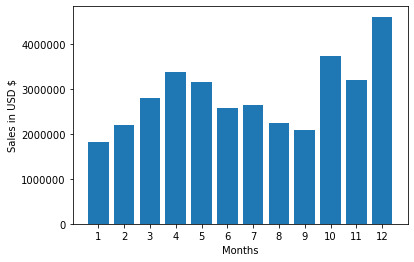

In [125]:
months = range(1,13)
plt.ticklabel_format(style='plain')
plt.bar(months,results)
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Months")
plt.show()

In [115]:
pd.options.display.float_format = '{:.2f}'.format

### Question2. What city has the highest numbers of sales?

### Task - get cities from Purchase Address

In [143]:
all_months_data[["Address","City","Postcode"]] = all_months_data["Purchase Address"].str.split(",", expand=True)

In [144]:
all_months_data.groupby("City")["Order ID"].count()

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Order ID, dtype: int64

### We can do the same with the apply and lambda function

In [145]:
all_months_data["City2"] = all_months_data["Purchase Address"].apply(lambda x: x.split(",")[1])

In [146]:
all_months_data.groupby("City2")["Order ID"].count()

City2
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Order ID, dtype: int64

### We need to concatenate City and ZipCode as there may be the same cities in other states

In [147]:
all_months_data["CityZip"] = all_months_data["City"] + all_months_data["Postcode"]

In [150]:
results_cities = all_months_data.groupby("CityZip")["Order ID"].count()

In [153]:
results_cities = results_cities.reset_index()

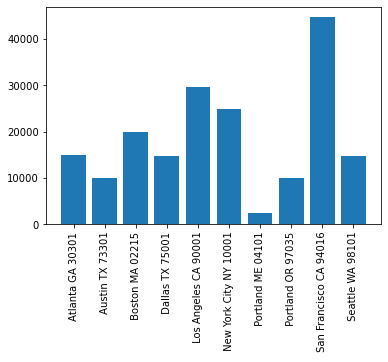

In [157]:

plt.bar(results_cities["CityZip"],results_cities["Order ID"])
plt.xticks(results_cities["CityZip"], rotation = 'vertical')
plt.show()

### Answer - As we can see on the graph, San Francisco CA 94016 is the city with the highest numbers of sales

### Question3. What time should we display the advertismenets to maximize likelihood of customer's buying product? <br> I have used histogram to show the frequency

### First task is to extract time from date

In [163]:
all_months_data["time"] = all_months_data["Order Date"].dt.time

In [175]:
all_months_data["hour"] = all_months_data["Order Date"].dt.hour

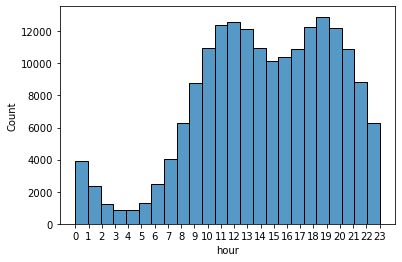

In [184]:
sns.histplot(all_months_data["hour"], bins=24)
plt.xticks(all_months_data["hour"].unique())
plt.show()

### In the histogram, it can be observed that the highest frequency occurs between 11 AM to 1 PM and between 6 PM to 8 PM.

### Question 4. What product are most often sold together?

In [229]:
products = all_months_data[["Order ID", "Product"]]

In [235]:
duplicated_products = products[products["Order ID"].duplicated(keep=False)]

In [240]:
duplicated_products["grouped"] = duplicated_products.groupby("Order ID")["Product"].transform(lambda x: (',').join(x))

In [241]:
duplicated_products

,Order ID,Product,grouped
3,176560,Google Phone,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,"Google Phone,Wired Headphones"
18,176574,Google Phone,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...
11628,259303,AA Batteries (4-pack),"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,"Google Phone,USB-C Charging Cable"
